In [7]:
import pandas as pd

pngdf = pd.read_csv("/home/yiw/gi/train_png.csv")
pngdf.head(200)

,id,class,segmentation,case,day,slice,image_path,height,width,mask_path
0,case123_day20_slice_0001,large_bowel,NaN,123,20,1,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
1,case123_day20_slice_0001,small_bowel,NaN,123,20,1,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
2,case123_day20_slice_0001,stomach,NaN,123,20,1,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
3,case123_day20_slice_0002,large_bowel,NaN,123,20,2,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
4,case123_day20_slice_0002,small_bowel,NaN,123,20,2,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
5,case123_day20_slice_0002,stomach,NaN,123,20,2,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
6,case123_day20_slice_0003,large_bowel,NaN,123,20,3,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
7,case123_day20_slice_0003,small_bowel,NaN,123,20,3,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
8,case123_day20_slice_0003,stomach,NaN,123,20,3,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...
9,case123_day20_slice_0004,large_bowel,NaN,123,20,4,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...


In [ ]:
# import pandas as pd
# df = pd.read_csv("/home/yiw/gi/train_final.csv")
# df["npz_mask_path"] = df.mask_path.apply(lambda x: x.replace("/home/yiw/gi/input/mask", "/home/yiw/gi/input/npz_mask").replace("png", "npy"))
# df["mask_path"] = df.npz_mask_path.apply(lambda x: x.replace("/home/yiw/gi/input/npz_mask", "/home/yiw/gi/input/np_mask/train"))
# df.drop(columns=["npz_mask_path"], inplace=True)
# df.to_csv("train_final.csv", index=False)
# df.head(100)

In [1]:
import numpy as np
import pandas as pd
pd.options.plotting.backend = "plotly"
import random
from glob import glob
import os, shutil
from tqdm.notebook import tqdm
tqdm.pandas()
import time
import copy
import joblib
import gc
from IPython import display as ipd
from joblib import Parallel, delayed

# visualization
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import tensorflow as tf

IMG_SIZE = [320, 384]

In [2]:
def load_img(path, size=IMG_SIZE):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    shape0 = np.array(img.shape[:2])
    resize = np.array(size)
    if np.any(shape0!=resize):
        diff = resize - shape0
        pad0 = diff[0]
        pad1 = diff[1]
        pady = [pad0//2, pad0//2 + pad0%2]
        padx = [pad1//2, pad1//2 + pad1%2]
        img = np.pad(img, [pady, padx])
        img = img.reshape((*resize))
        
#     img = np.tile(img[...,None], [1, 1, 3]) # gray to rgb
#     img = img.astype('float32') # original is uint16
#     mx = np.max(img)
#     if mx:
#         img/=mx # scale image to [0, 1]
    return img

def load_msk(path, size=IMG_SIZE):
    msk = np.load(path)
#     msk = msk.astype('float32')
#     msk/=255.0
#     msk = cv2.resize(msk, dsize=size, interpolation=cv2.INTER_NEAREST)
    shape0 = np.array(msk.shape[:2])
    resize = np.array(size)
    if np.any(shape0!=resize):
        diff = resize - shape0
        pad0 = diff[0]
        pad1 = diff[1]
        pady = [pad0//2, pad0//2 + pad0%2]
        padx = [pad1//2, pad1//2 + pad1%2]
        msk = np.pad(msk, [pady, padx, [0,0]])
        msk = msk.reshape((*resize, 3))
    return msk

def show_img(img, mask=None):
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = [ "Large Bowel", "Small Bowel", "Stomach"]
        plt.legend(handles,labels)
    plt.axis('on')
    
def load_imgs(img_paths, size=IMG_SIZE):
    imgs = np.zeros((*size, len(img_paths)), dtype=np.uint16)
    for i, img_path in enumerate(img_paths):
        img = load_img(img_path, size=size)
        imgs[..., i]+=img
    return imgs

In [8]:
df = pd.read_csv('/home/yiw/gi/train_png.csv')
df['segmentation'] = df.segmentation.fillna('')
df['rle_len'] = df.segmentation.map(len) # length of each rle mask

df2 = df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index() # rle list of each id
df2 = df2.merge(df.groupby(['id'])['rle_len'].agg(sum).to_frame().reset_index()) # total length of all rles of each id

df = df.drop(columns=['segmentation', 'rle_len'])
df = df.groupby(['id']).head(1).reset_index(drop=True)
df = df.merge(df2, on=['id'])
df['empty'] = (df.rle_len==0) # empty masks
# pd.set_option('display.max_rows', None)
df.head(200)

,id,class,case,day,slice,image_path,height,width,mask_path,segmentation,rle_len,empty
0,case123_day20_slice_0001,large_bowel,123,20,1,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
1,case123_day20_slice_0002,large_bowel,123,20,2,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
2,case123_day20_slice_0003,large_bowel,123,20,3,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
3,case123_day20_slice_0004,large_bowel,123,20,4,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
4,case123_day20_slice_0005,large_bowel,123,20,5,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
5,case123_day20_slice_0006,large_bowel,123,20,6,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
6,case123_day20_slice_0007,large_bowel,123,20,7,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
7,case123_day20_slice_0008,large_bowel,123,20,8,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
8,case123_day20_slice_0009,large_bowel,123,20,9,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True
9,case123_day20_slice_0010,large_bowel,123,20,10,/home/yiw/gi/input/train/case123/case123_day20...,266,266,/home/yiw/gi/input/np_mask/train/case123/case1...,"[, , ]",0,True


In [9]:
channels=3
stride=2
for i in range(channels):
    df[f'image_path_{i:02}'] = df.groupby(['case','day'])['image_path'].shift(-i*stride).fillna(method="ffill")
df['image_paths'] = df[[f'image_path_{i:02d}' for i in range(channels)]].values.tolist()
df.image_paths[0]

['/home/yiw/gi/input/train/case123/case123_day20/scans/slice_0001_266_266_1.50_1.50.png',
 '/home/yiw/gi/input/train/case123/case123_day20/scans/slice_0003_266_266_1.50_1.50.png',
 '/home/yiw/gi/input/train/case123/case123_day20/scans/slice_0005_266_266_1.50_1.50.png']

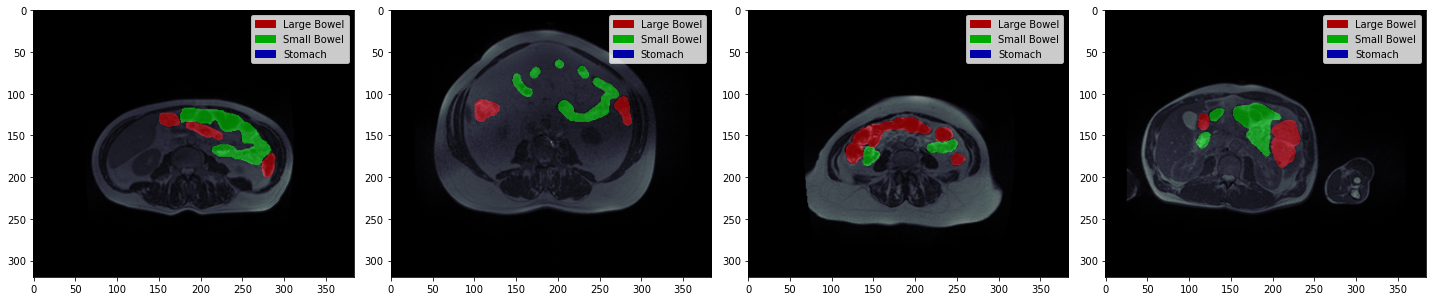

In [19]:
row=1; col=4
plt.figure(figsize=(5*col,5*row))
for i, id_ in enumerate(df[df['empty']==0].sample(frac=1.0)['id'].unique()[:row*col]):
    idf = df[df['id']==id_]
    img = load_img(idf.image_path.iloc[0])
    mask = load_msk(idf.mask_path.iloc[0])
    plt.subplot(row, col, i+1)
    i+=1
    show_img(img, mask=mask)
    plt.tight_layout()

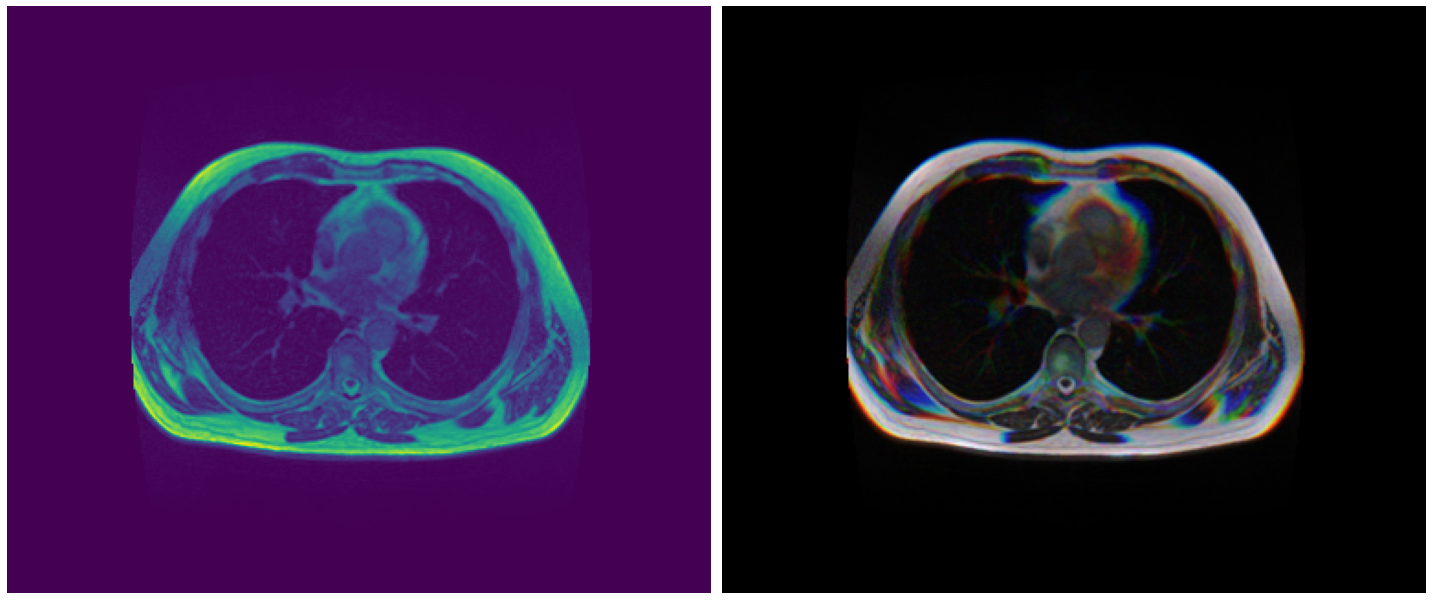

In [20]:
idx = 40

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
img = load_img(df.image_path[idx]).astype('float32')
img/=img.max()
plt.imshow(img)
plt.axis('off')


plt.subplot(1, 2, 2)
imgs = load_imgs(df.image_paths[idx]).astype('float32')
imgs/=imgs.max(axis=(0,1))
plt.imshow(imgs)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
IMAGE_DIR = '/tmp/images'
MASK_DIR = '/tmp/masks'
!mkdir -p $IMAGE_DIR && mkdir -p $MASK_DIR

In [ ]:
def save_mask(id_):
    row = df[df['id']==id_].squeeze()
    
    img_paths = row.image_paths
    imgs = load_imgs(img_paths)
    np.save(f'{IMAGE_DIR}/{id_}.npy', imgs)
    
    msk_path = row.mask_path
    msk = load_msk(msk_path)
    np.save(f'{MASK_DIR}/{id_}.npy', msk)
    
    return

ids = df['id'].unique()
_ = Parallel(n_jobs=-1, backend='threading')(delayed(save_mask)(id_)\
                                             for id_ in tqdm(ids, total=len(ids)))

In [ ]:
plt.figure(figsize=(15, 5))

imgs = np.load(f'{IMAGE_DIR}/case123_day0_slice_0080.npy').astype('float32')
imgs/=imgs.max(axis=(0,1))

plt.subplot(1, 3, 1)
plt.imshow(imgs)

msk = np.load(f'{MASK_DIR}/case123_day0_slice_0080.npy').astype('float32')
msk/=255.0

plt.subplot(1, 3, 2)
plt.imshow(msk)


plt.subplot(1, 3, 3)
plt.imshow(imgs)
plt.imshow(msk, alpha=0.5)

In [ ]:
df.to_csv('train_full_meta.csv', index=False)

In [ ]:
df.head(100)